<a href="https://colab.research.google.com/github/Vkavyasree732/Repository1/blob/main/MHC2024008_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.2, random_state = 42)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (120, 4)
x_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#linear kernel
svm_linear = SVC(kernel = 'linear')
svm_linear.fit(x_train,y_train)
y_pred_linear = svm_linear.predict(x_test)
accuracy_linear = accuracy_score(y_test,y_pred_rbf)
print(f"linear kernel accuracy: {accuracy_rbf}")

#RBF kernel
svm_rbf = SVC(kernel = 'rbf')
svm_rbf.fit(x_train,y_train)
y_pred_rbf = svm_rbf.predict(x_test)
accuracy_rbf = accuracy_score(y_test,y_pred_rbf)
print(f"RBF kernel accuracy : { accuracy_rbf}")


linear kernel accuracy: 1.0
RBF kernel accuracy : 1.0


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer

# Define the evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),  # Use macro average for multi-class
    'recall': make_scorer(recall_score, average='macro')  # Use macro average for multi-class
}


# 5-Fold Cross-Validation for Linear Kernel
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_linear = cross_val_score(svm_linear, iris.data, iris.target, cv=kf, scoring='accuracy') # Use accuracy for cross_val_score
print(f"Linear Kernel Cross-Validation Scores: {scores_linear}")
print(f"Linear Kernel Mean Accuracy: {scores_linear.mean()}")

# Detailed evaluation metrics using cross_validate
from sklearn.model_selection import cross_validate

cv_results_linear = cross_validate(svm_linear, iris.data, iris.target, cv=kf, scoring=scoring)

print("Linear Kernel Cross-Validation Results:")
for metric, scores in cv_results_linear.items():
    if metric.startswith('test_'):
        print(f"{metric}: {scores.mean()}")


# 5-Fold Cross-Validation for RBF Kernel
scores_rbf = cross_val_score(svm_rbf, iris.data, iris.target, cv=kf, scoring='accuracy')
print(f"RBF Kernel Cross-Validation Scores: {scores_rbf}")
print(f"RBF Kernel Mean Accuracy: {scores_rbf.mean()}")

cv_results_rbf = cross_validate(svm_rbf, iris.data, iris.target, cv=kf, scoring=scoring)

print("\nRBF Kernel Cross-Validation Results:")
for metric, scores in cv_results_rbf.items():
    if metric.startswith('test_'):
        print(f"{metric}: {scores.mean()}")

Linear Kernel Cross-Validation Scores: [1.         1.         0.96666667 0.93333333 0.96666667]
Linear Kernel Mean Accuracy: 0.9733333333333334
Linear Kernel Cross-Validation Results:
test_accuracy: 0.9733333333333334
test_precision: 0.9775132275132276
test_recall: 0.9744444444444443
RBF Kernel Cross-Validation Scores: [1.         1.         0.93333333 0.93333333 0.96666667]
RBF Kernel Mean Accuracy: 0.9666666666666668

RBF Kernel Cross-Validation Results:
test_accuracy: 0.9666666666666668
test_precision: 0.9672222222222221
test_recall: 0.9672222222222221


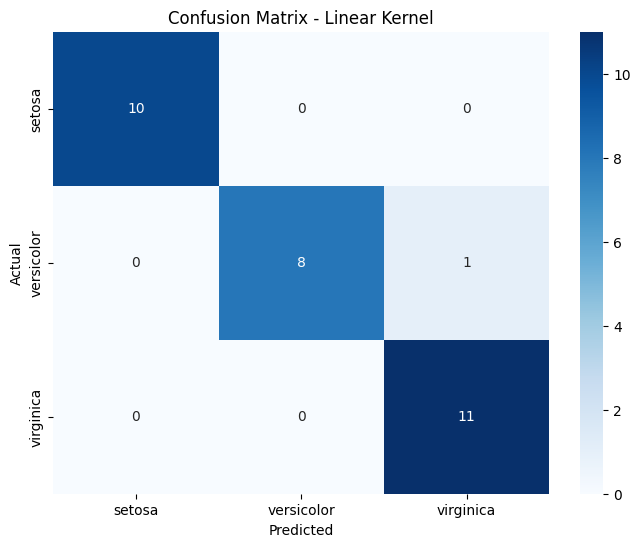

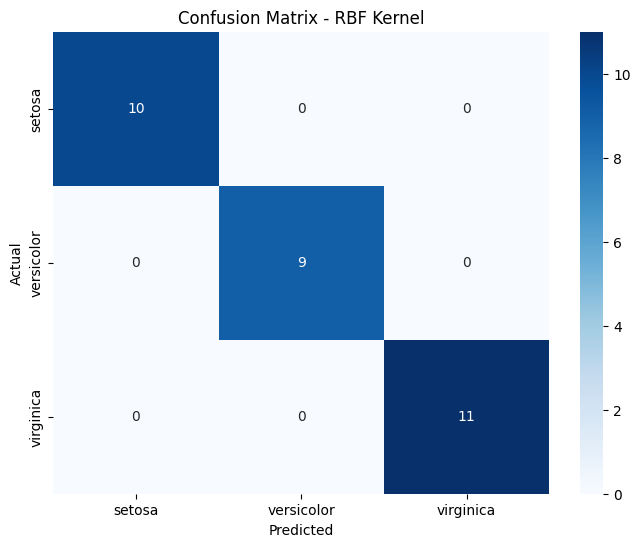

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Linear Kernel
cm_linear = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear Kernel")
plt.show()

# Confusion Matrix for RBF Kernel
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RBF Kernel")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Classification Report for Linear Kernel
print("Classification Report - Linear Kernel:")
print(classification_report(y_test, y_pred_linear, target_names=iris.target_names))

# Classification Report for RBF Kernel
print("\nClassification Report - RBF Kernel:")
print(classification_report(y_test, y_pred_rbf, target_names=iris.target_names))

Classification Report - Linear Kernel:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Classification Report - RBF Kernel:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

